### les importations neccessaires :

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras  import Sequential
from keras import layers


### les troix méthodes suivantes peuvent importer les image dans jupyter notebook




######          la méthode image_dataset_from_directory  permet d'importer la dataset sans opérations suplementaires : 

In [23]:
dataset1 = keras.preprocessing.image_dataset_from_directory(
  'A:\datasets\PetImages', batch_size=10, image_size=(200, 200), shuffle=True, seed=None, validation_split=None,)

Found 25000 files belonging to 2 classes.


###### on peut visualiser les images importées comme suit : 

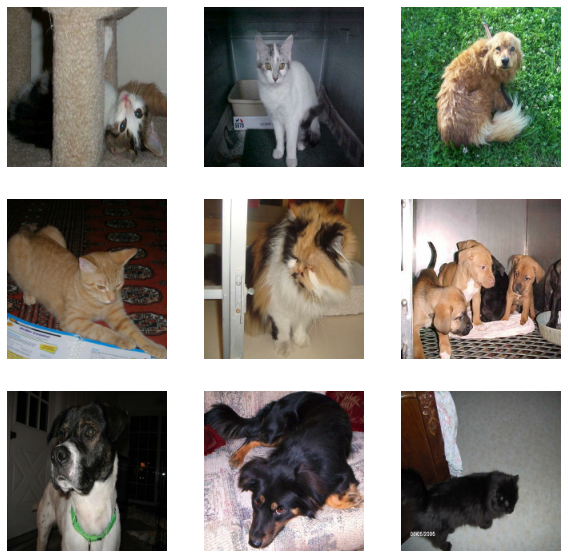

In [24]:
plt.figure(figsize = (10,10))
for images, labels in dataset1.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
images=dataset1.take(1)
#plotImages(images)

###### la méthode ImageDataGenerator avec flow_from-directory permettent d'importer la dataset avec des opérations d'augmentation :

     plusieurs oprérations peuvent etre faites dans ImageDataGenerator qui seront par la suite     utiliser dans l'entrainement de modele 

In [49]:
def my_preprocessing_func(img):
    image = np.array(img)
    return image / 255

datagenerator=ImageDataGenerator(
    rotation_range=10, # rotation
    width_shift_range=0.2, # horizontal shift
    height_shift_range=0.2, # vertical shift
    zoom_range=0.2, # zoom
    horizontal_flip=True, # horizontal flip
    brightness_range=[0.2,1.2],# brightness
    preprocessing_function=my_preprocessing_func
) 


dataset2 =datagenerator.flow_from_directory(directory='A:\datasets\PetImages', target_size=(224,224), classes=['cat', 'dog'], batch_size=10)


Found 25000 images belonging to 2 classes.


###### on peut visualiser les images comme suit :

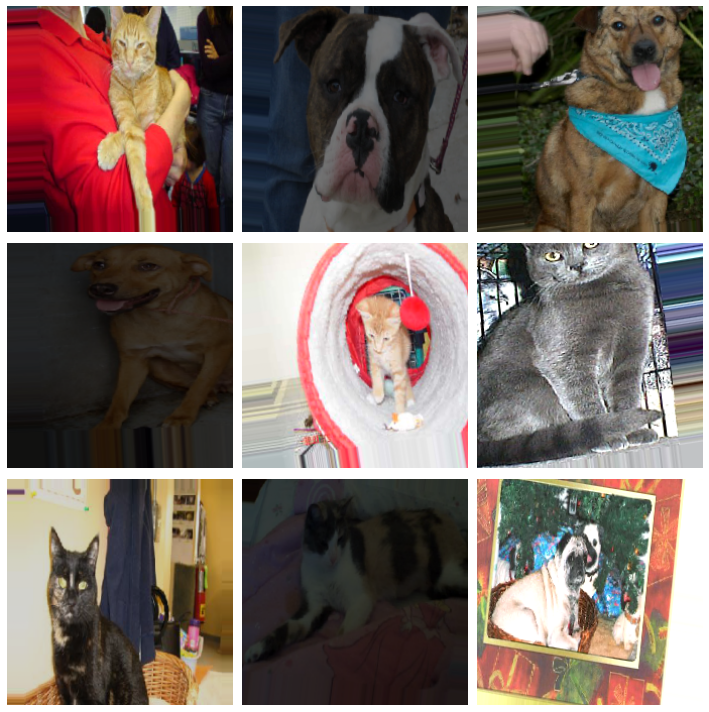

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [50]:
#affectation d'un batch de la dataset
batch_images,batch_labels=next(dataset2)

def plotImages(images):
    fig, axes = plt.subplots(3, 3, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
plotImages(batch_images)
print(batch_labels)

### on peut ajouter des couches dans le modèle afin de faire quelques opération de preprocessing telque :
- redimensionement 
- scaling
- CenterCrop

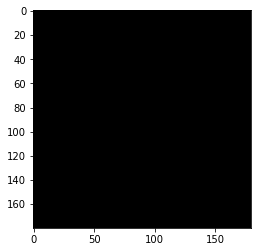

In [57]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  preprocessing.Rescaling(1./255)
])

result = resize_and_rescale(batch_images[2])
_ = plt.imshow(result)

### on peut aussi ajouter des couches dans le modèle afin de faire quelques opération d'augmentation  telque :
- RandomFlip :  retourner aléatoirement chaque image horizontalement et verticalement
- RandomRotation :  faire tourner chaque image de façon aléatoire.
- RandomContrast :  ajuster le contraste d'une ou plusieurs images par un facteur aléatoire
- RandomCrop :  recadrage aléatoire des images à la hauteur et à la largeur cibles
- RandomZoom :  Zoomer aléatoirement chaque image pendant la formation 

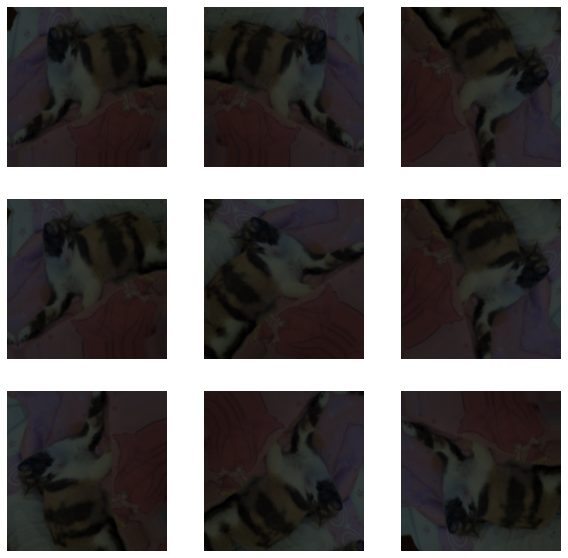

In [61]:
data_augmentation = tf.keras.Sequential([
  preprocessing.RandomFlip("horizontal_and_vertical"),
  preprocessing.RandomRotation(0.2),
])

# Add the image to a batch
image = tf.expand_dims(batch_images[7], 0)

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

### l'augmentation de données peut etre une partie de modele 
Lors de l'exportation de modèle . les couches de prétraitement seront enregistrées avec le reste de votre modèle. Si on déploie , normalisera automatiquement les images

In [31]:
model = tf.keras.Sequential([
  resize_and_rescale,
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  
    # le reste de modele
    
])





In [62]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1
